In [1]:
import pandas as pd

casas = pd.read_csv("housing.csv")

In [2]:
casas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

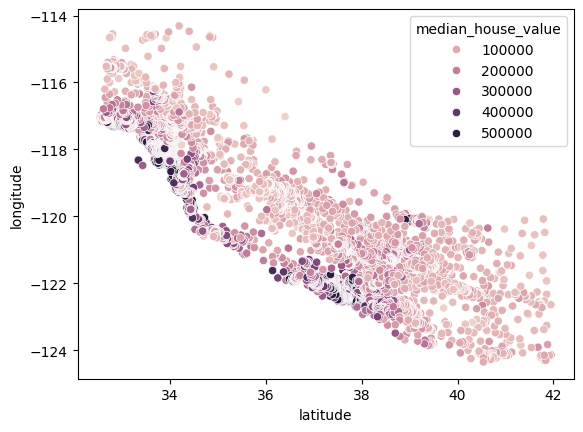

In [3]:
import seaborn as sb

sb.scatterplot(
    x="latitude",
    y="longitude",
    data= casas,
    hue= "median_house_value"
)

<Axes: xlabel='latitude', ylabel='longitude'>

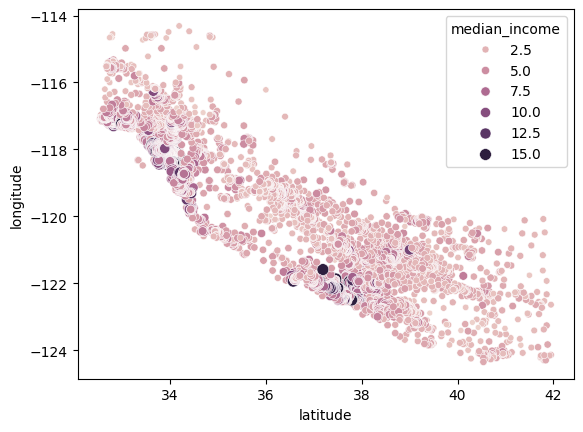

In [ ]:
sb.scatterplot(
    
    x="latitude",
    y="longitude",
    data= casas,
    hue= "median_income",
    size=casas["median_income"]
)

In [12]:
casas.loc[:, ["latitude", "longitude", "median_income"]]

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [13]:
x = casas.loc[:, ["latitude", "longitude", "median_income"]]

In [24]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=6)


In [25]:
predicciones = modelo.fit_predict(x)

In [26]:
predicciones

array([2, 2, 2, ..., 1, 1, 1], shape=(20640,), dtype=int32)

In [27]:
predicciones.shape

(20640,)

In [28]:
x["segunmento_economico"] = predicciones

In [ ]:
x["segunmento_economico"].value_counts()

segunmento_economico
4     449
0    2290
2    3006
5    3443
1    5376
3    6076
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

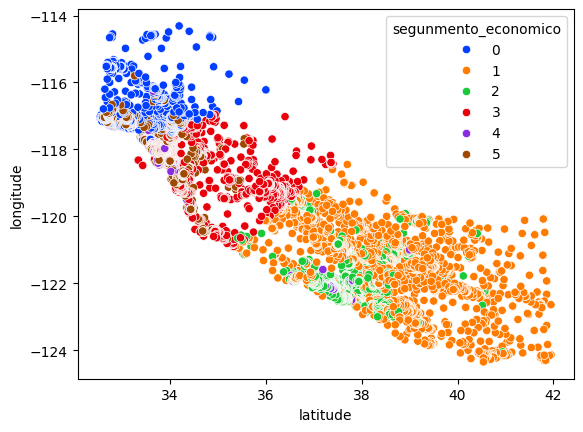

In [35]:
sb.scatterplot(
    
    x="latitude",
    y="longitude",
    data= x,
    hue= "segunmento_economico",
    palette="bright"
)

<Axes: xlabel='segunmento_economico', ylabel='count'>

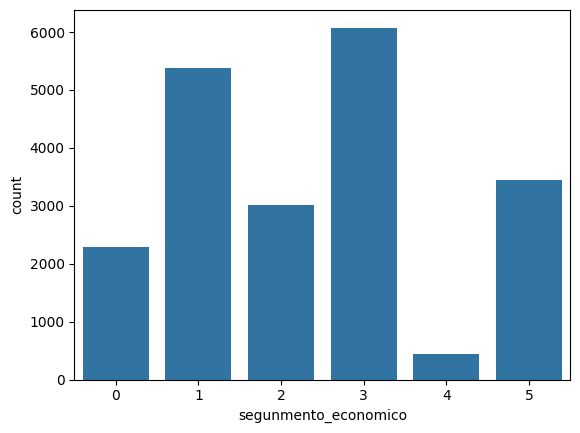

In [33]:
sb.countplot(
    x="segunmento_economico",
    data=x
)

In [36]:
x.groupby(["segunmento_economico"])["median_income"].mean()

segunmento_economico
0     2.890910
1     2.734006
2     5.373862
3     2.936285
4    11.027631
5     5.700362
Name: median_income, dtype: float64